# Unemployment rate India

In [1]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# Monthly data
monthly = pd.read_csv('/Users/notorious/Desktop/Learning/Coursera/Applied-Plotting-Charting-Data-Representation-in-Python-University-of-Michigan/Week 4/Assignment/Datasets UTs/Unemployment_Rate_M_Urban.txt', sep = ',', skiprows = 1)
monthly.head()

,Region,Date,Frequency,Value
0,Andhra Pradesh,2016-01-31,M,20.17
1,Andhra Pradesh,2016-02-29,M,9.73
2,Andhra Pradesh,2016-03-31,M,15.63
3,Andhra Pradesh,2016-04-30,M,9.68
4,Andhra Pradesh,2016-05-31,M,7.34


In [3]:
# Data Cleaning
monthly.columns = monthly.columns.str.strip()
monthly['Date'] = pd.to_datetime(monthly['Date'])

In [4]:
# Classifying as categories
monthly['is_UT'] = 'States';
UT = ['Delhi', 'Chandigarh', 'Puducherry']
monthly.head()
monthly['is_UT'][monthly['Region'] == 'India'] = 'India Urban' ; # Classifying India Urban


/var/folders/mf/nscbhmyd6nd_t_f82x00d0h00000gn/T/ipykernel_2339/768020272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly['is_UT'][monthly['Region'] == 'India'] = 'India Urban' ; # Classifying India Urban


In [5]:
for key, value in monthly['Region'].items():
    if value in UT:
        monthly['is_UT'][key] = 'UTs'  

/var/folders/mf/nscbhmyd6nd_t_f82x00d0h00000gn/T/ipykernel_2339/654259881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly['is_UT'][key] = 'UTs'


In [6]:
monthly['Month'] = pd.DatetimeIndex(monthly['Date']).month
monthly['Year'] = pd.DatetimeIndex(monthly['Date']).year
monthly.head()

,Region,Date,Frequency,Value,is_UT,Month,Year
0,Andhra Pradesh,2016-01-31,M,20.17,States,1,2016
1,Andhra Pradesh,2016-02-29,M,9.73,States,2,2016
2,Andhra Pradesh,2016-03-31,M,15.63,States,3,2016
3,Andhra Pradesh,2016-04-30,M,9.68,States,4,2016
4,Andhra Pradesh,2016-05-31,M,7.34,States,5,2016


In [7]:
monthly['is_UT'].unique()
grouped = monthly.groupby(['is_UT','Year','Month']).mean()
grouped = grouped.reset_index()

In [8]:
import calendar
grouped['Month'] = grouped['Month'].apply(lambda x: calendar.month_abbr[x])
grouped.head()

,is_UT,Year,Month,Value
0,India Urban,2016,Jan,10.52
1,India Urban,2016,Feb,10.56
2,India Urban,2016,Mar,11.65
3,India Urban,2016,Apr,11.33
4,India Urban,2016,May,12.07


In [9]:
x_labels = grouped['Month'].astype(str) +  grouped['Year'].astype(str).map(lambda x: x[2:])

x_labels[:5]

0    Jan16
1    Feb16
2    Mar16
3    Apr16
4    May16
dtype: object

<IPython.core.display.Javascript object>


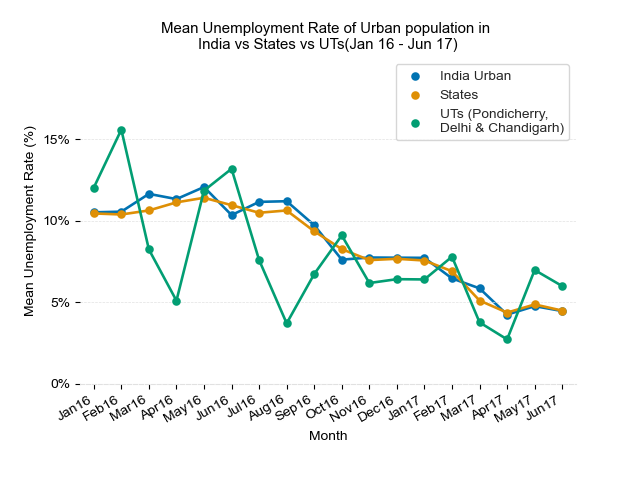

[Text(0, 0, '0%'), Text(0, 5, '5%'), Text(0, 10, '10%'), Text(0, 15, '15%')]

In [10]:
import seaborn as sns
fig = plt.figure()

sns.pointplot(x = x_labels, y = 'Value', hue = 'is_UT', data = grouped, palette = "colorblind", scale = 0.7, linewidth = '')

# Aesthetics
sns.set_style("white", {'font-family': [u'Arial']})
sns.set_context('notebook', font_scale=.90)

sns.despine(left = True)
plt.xlabel('Month')
plt.ylabel('Mean Unemployment Rate (%)')
plt.title('Mean Unemployment Rate of Urban population in \nIndia vs States vs UTs(Jan 16 - Jun 17)')

plt.gca().spines['bottom'].set_color('#e1e1e1')
plt.gca().spines['bottom'].set_linestyle('--')
fig.autofmt_xdate()
plt.gca().set_ylim(0,20)
plt.gca().set_yticks(range(0,20,5))
plt.gca().yaxis.grid(which = 'major', color = '#e1e1e1', linestyle = '--', linewidth = 0.5)

# Customize legend
plt.legend(title='Regions')

ylabs = plt.gca().get_yticks().astype(int).astype(str)
ylabs  = [str(x) + '%' for x in ylabs]
plt.gca().set_yticklabels(ylabs)

ylabs = plt.gca().get_yticks().astype(int).astype(str)
ylabs  = [str(x) + '%' for x in ylabs]
plt.gca().set_yticklabels(ylabs)

In [11]:
plt.legend().get_texts()[2].set_text('UTs (Pondicherry, \nDelhi & Chandigarh)')